# Data visualisation and manipulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
voice = pd.read_csv("./datasets/features.csv", index_col=0)
print(voice.shape)
voice.head()

(7942, 112)


,pitch,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc102,mfcc103,mfcc104,mfcc105,mfcc106,mfcc107,mfcc108,mfcc109,mfcc110,label
0,111.888112,-510.597784,-505.053398,-499.959595,-178.190516,-148.948786,-134.754572,-95.023028,-217.987904,-182.906212,...,7.870008,6.556117,1.736444,-2.775575,8.263644,6.838414,-5.706881,-6.487910,2.364354,male
1,53.511706,-505.605406,-486.197290,-499.395205,-120.378805,-180.395347,-143.305227,-169.727007,-141.744821,-175.630594,...,5.915203,-8.883986,-7.964084,-3.190612,-3.025079,2.058585,20.512130,12.873238,16.508414,male
2,125.000000,-437.255700,-441.068030,-190.264004,-160.938226,-161.990960,-92.527338,-248.596371,-130.640863,-149.144037,...,-0.906071,1.655197,-4.271711,-5.712824,10.938442,-7.166239,2.408163,6.308542,-12.427919,male
3,111.888112,-510.597784,-505.053398,-499.959595,-178.190516,-148.948786,-134.754572,-95.023028,-217.987904,-182.906212,...,7.870008,6.556117,1.736444,-2.775575,8.263644,6.838414,-5.706881,-6.487910,2.364354,male
4,141.592920,-497.002436,-458.034473,-97.263039,-79.358949,-193.989282,-208.980368,-247.343874,-81.263047,-90.754025,...,0.537491,-8.843164,-3.455724,-8.615255,-9.572706,14.831292,14.022642,12.223706,8.603760,male


In [4]:
voice.isnull().any()

pitch      False
mfcc1      False
mfcc2      False
mfcc3      False
mfcc4      False
           ...  
mfcc107    False
mfcc108    False
mfcc109    False
mfcc110    False
label      False
Length: 112, dtype: bool

<AxesSubplot:>

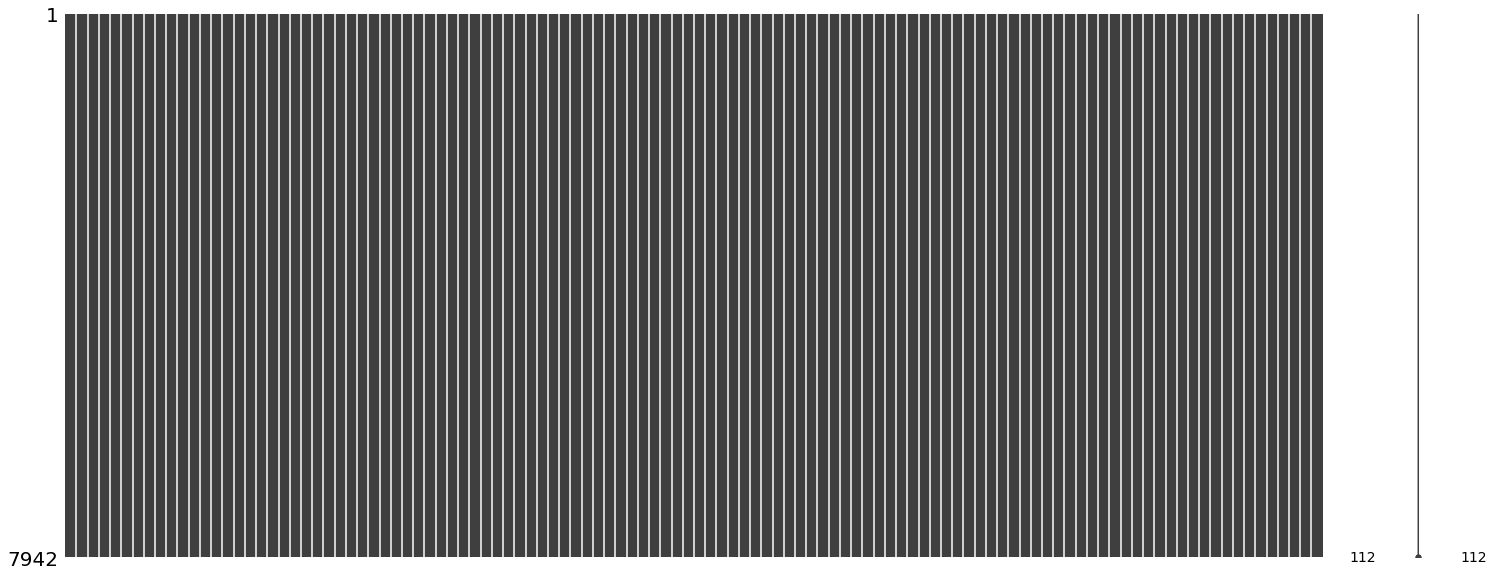

In [5]:
msno.matrix(voice)

In [6]:
X = voice.iloc[:, :-1].values
y = voice.iloc[:,-1:].values

In [7]:
#Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer = imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])

In [8]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y.ravel())

In [9]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)

In [11]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
# sc_X = sc_X.fit(X_train)
x_train_scaled = sc_X.fit_transform(X_train)
x_test_scaled = sc_X.transform(X_test)

# Different Models

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [13]:
# #Making the confusion matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, pred)
# print(cm)

# correct_pred=sum(pred == y_test)
# print(correct_pred)
# print('accuracy = ', correct_pred*100/(pred.shape[0]))

In [14]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

In [15]:
models_info = []

for i in range(len(models)):
    clf = models[i]
    clf.fit(x_train_scaled,y_train)
    pred = clf.predict(x_test_scaled)
    acc = accuracy_score(pred,y_test)
    
    models_info.append(
        {
            'acc': acc,
            'name': model_names[i],
            "model": models[i]
        })
    print("Accuracy of {} is: {}".format(model_names[i], acc))

Accuracy of LogisticRegression is: 0.7344241661422278
Accuracy of LinearSVM is: 0.7319068596601637
Accuracy of rbfSVM is: 0.8558842039018251
Accuracy of KNearestNeighbors is: 0.8011327879169289
Accuracy of RandomForestClassifier is: 0.8835745752045312
Accuracy of DecisionTree is: 0.78980490874764
Accuracy of GradientBoostingClassifier is: 0.8823159219634991
Accuracy of GaussianNB is: 0.6557583385777218


In [16]:
models_info

[{'acc': 0.7344241661422278,
  'name': 'LogisticRegression',
  'model': LogisticRegression()},
 {'acc': 0.7319068596601637, 'name': 'LinearSVM', 'model': LinearSVC()},
 {'acc': 0.8558842039018251, 'name': 'rbfSVM', 'model': SVC()},
 {'acc': 0.8011327879169289,
  'name': 'KNearestNeighbors',
  'model': KNeighborsClassifier()},
 {'acc': 0.8835745752045312,
  'name': 'RandomForestClassifier',
  'model': RandomForestClassifier()},
 {'acc': 0.78980490874764,
  'name': 'DecisionTree',
  'model': DecisionTreeClassifier()},
 {'acc': 0.8823159219634991,
  'name': 'GradientBoostingClassifier',
  'model': GradientBoostingClassifier()},
 {'acc': 0.6557583385777218, 'name': 'GaussianNB', 'model': GaussianNB()}]

In [17]:
acc_frame=pd.DataFrame(models_info)
acc_frame = acc_frame.sort_values(by="acc", ascending = False)
acc_frame.rename(columns={"acc": "Accuracy", "name": "Modelling Algorithm"}, inplace=True)

acc_frame

,Accuracy,Modelling Algorithm,model
4,0.883575,RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r..."
6,0.882316,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...
2,0.855884,rbfSVM,SVC()
3,0.801133,KNearestNeighbors,KNeighborsClassifier()
5,0.789805,DecisionTree,DecisionTreeClassifier()
0,0.734424,LogisticRegression,LogisticRegression()
1,0.731907,LinearSVM,LinearSVC()
7,0.655758,GaussianNB,GaussianNB()


<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algorithm'>

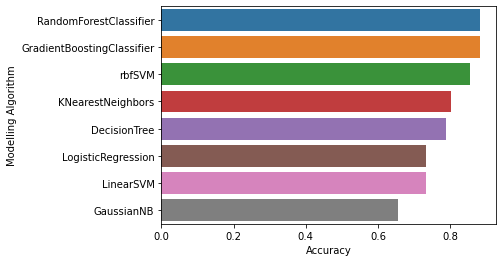

In [18]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_frame)

# Parameter Tuning

### Random Forest Classifier

In [19]:
# from sklearn.model_selection import RandomizedSearchCV

# params_dict={'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = params_dict, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf.fit(x_train_scaled,y_train)

In [20]:
# print("Best Score is: {}".format(rf.best_score_))
# print("Best params are: {}".format(rf.best_params_))
# print("Best Accuracy Score is: {}".format(accuracy_score(rf.predict(x_test_scaled),y_test)))
# print("Best Precision Score is: {}".format(precision_score(rf.predict(x_test_scaled),y_test)))

In [21]:
for model_info in models_info:
    if model_info["name"]=="RandomForestClassifier":
        new_model = {
            "name": model_info["name"], 
            "model": RandomForestClassifier(
                n_estimators=800,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',
                max_depth=70,bootstrap=False
        )}
        model_info.update(new_model)

In [22]:
models_info

[{'acc': 0.7344241661422278,
  'name': 'LogisticRegression',
  'model': LogisticRegression()},
 {'acc': 0.7319068596601637, 'name': 'LinearSVM', 'model': LinearSVC()},
 {'acc': 0.8558842039018251, 'name': 'rbfSVM', 'model': SVC()},
 {'acc': 0.8011327879169289,
  'name': 'KNearestNeighbors',
  'model': KNeighborsClassifier()},
 {'acc': 0.8835745752045312,
  'name': 'RandomForestClassifier',
  'model': RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                         n_estimators=800)},
 {'acc': 0.78980490874764,
  'name': 'DecisionTree',
  'model': DecisionTreeClassifier()},
 {'acc': 0.8823159219634991,
  'name': 'GradientBoostingClassifier',
  'model': GradientBoostingClassifier()},
 {'acc': 0.6557583385777218, 'name': 'GaussianNB', 'model': GaussianNB()}]

### SVC

In [23]:
# param_grid = {'C': [0.1, 1, 10, 100],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf', 'linear']}
 
# svc = GridSearchCV(estimator = SVC(), param_grid=param_grid, refit = True, verbose = 3)
# svc.fit(x_train_scaled,y_train)

In [24]:
# print("Best Score is: {}".format(svc.best_score_))
# print("Best params are: {}".format(svc.best_params_))
# print("Best Accuracy Score is: {}".format(accuracy_score(svc.predict(x_test_scaled),y_test)))
# print("Best Precision Score is: {}".format(precision_score(svc.predict(x_test_scaled),y_test)))

# Save Models

In [25]:
import pickle
pickle.dump(sc_X, open("out/scaler/scaler.sav", "wb"))

In [26]:
# for i in range(len(models_info)):
#     clf = models_info[i]["model"]
#     clf.fit(x_train_scaled, y_train)
#     pickle.dump(clf, open("out/models/{}.sav".format(models_info[i]["name"]), "wb"))
#     print("{} saved!,  {}".format(models_info[i]["name"], models_info[i]["model"]))

# Save the model and scaler

In [27]:
# model_rf = models_info[4]["model"]
# model_rf.fit(x_train_scaled, y_train)

# pickle.dump(model_rf, open("out/models/rf_model_final.sav", "wb"))

### Load and Test Random Forest Classifier Model

In [28]:
model_rf = pickle.load(open('out/models/RandomForestClassifier.sav', 'rb'))

pred_rf=model_rf.predict(x_test_scaled)
print("Random Forest Classifier Model Accuracy Score is: {}".format(accuracy_score(pred_rf,y_test)))

Random Forest Classifier Model Accuracy Score is: 0.9779735682819384


### Load and Test SVC Model

In [29]:
model_svc = pickle.load(open('out/models/rbfSVM.sav', 'rb'))

pred_svc=model_svc.predict(x_test_scaled)
print("SVC Model Accuracy Score is: {}".format(accuracy_score(pred_svc,y_test)))

SVC Model Accuracy Score is: 0.9257394587791064


In [30]:
model_gbc = pickle.load(open('out/models/GradientBoostingClassifier.sav', 'rb'))

pred_gbc=model_gbc.predict(x_test_scaled)
print("GradientBoostingClassifier Model Accuracy Score is: {}".format(accuracy_score(pred_gbc,y_test)))

GradientBoostingClassifier Model Accuracy Score is: 0.8999370673379484


# Test Single Value

In [31]:
voice.head()

,pitch,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc102,mfcc103,mfcc104,mfcc105,mfcc106,mfcc107,mfcc108,mfcc109,mfcc110,label
0,111.888112,-510.597784,-505.053398,-499.959595,-178.190516,-148.948786,-134.754572,-95.023028,-217.987904,-182.906212,...,7.870008,6.556117,1.736444,-2.775575,8.263644,6.838414,-5.706881,-6.487910,2.364354,male
1,53.511706,-505.605406,-486.197290,-499.395205,-120.378805,-180.395347,-143.305227,-169.727007,-141.744821,-175.630594,...,5.915203,-8.883986,-7.964084,-3.190612,-3.025079,2.058585,20.512130,12.873238,16.508414,male
2,125.000000,-437.255700,-441.068030,-190.264004,-160.938226,-161.990960,-92.527338,-248.596371,-130.640863,-149.144037,...,-0.906071,1.655197,-4.271711,-5.712824,10.938442,-7.166239,2.408163,6.308542,-12.427919,male
3,111.888112,-510.597784,-505.053398,-499.959595,-178.190516,-148.948786,-134.754572,-95.023028,-217.987904,-182.906212,...,7.870008,6.556117,1.736444,-2.775575,8.263644,6.838414,-5.706881,-6.487910,2.364354,male
4,141.592920,-497.002436,-458.034473,-97.263039,-79.358949,-193.989282,-208.980368,-247.343874,-81.263047,-90.754025,...,0.537491,-8.843164,-3.455724,-8.615255,-9.572706,14.831292,14.022642,12.223706,8.603760,male


In [32]:
t = voice.iloc[:,0:-1].head(1)
t

,pitch,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc101,mfcc102,mfcc103,mfcc104,mfcc105,mfcc106,mfcc107,mfcc108,mfcc109,mfcc110
0,111.888112,-510.597784,-505.053398,-499.959595,-178.190516,-148.948786,-134.754572,-95.023028,-217.987904,-182.906212,...,15.621741,7.870008,6.556117,1.736444,-2.775575,8.263644,6.838414,-5.706881,-6.48791,2.364354


In [33]:
scaler = pickle.load(open("out/scaler/scaler.pkl", "rb"))

t1 = scaler.transform(t)
t1

array([[-0.82027195, -0.31822157, -0.70999436, -1.53303301,  0.55220454,
         0.86242035,  1.03879532,  1.30303253,  0.81495875,  1.17485826,
         1.37919965,  0.78292099,  0.19117689,  0.02772572,  0.23696693,
         0.95510763, -1.14002406, -2.55991894, -0.66767311,  1.17832464,
         0.60486603,  1.46165031,  1.5483799 , -0.29039153, -0.08057036,
         0.51119673,  0.61969888,  0.63145584, -0.64711929, -1.17928601,
         0.00937597,  0.20176818,  0.25824115,  0.98439736,  0.05715802,
         0.51384526,  1.04309544,  0.10229371, -1.31500035,  0.34218292,
         0.88193575,  0.62365467, -0.78207324, -1.09059   , -1.04081722,
         0.18183781,  0.53376991,  0.78132123,  0.37376719, -0.51241456,
         0.27123649,  0.19233945, -1.99103716, -1.25145135, -0.91136814,
        -0.68930318,  0.60636223,  0.15563469,  0.39171126, -0.06864815,
         1.41906979,  0.1059442 ,  1.16320742, -1.31024324,  0.15857815,
         0.38169041,  0.28400601,  0.58508412, -0.1

In [34]:
pred=model_rf.predict(t1)
txt = '{gender} Predicted by \"Random Forest Model\"'.format(gender='Male' if pred==1 else 0)
print(txt)

Male Predicted by "Random Forest Model"


In [35]:
pred=model_svc.predict(t1)
txt = '{gender} Predicted by \"SVC Model\"'.format(gender='Male' if pred==1 else 0)
print(txt)

Male Predicted by "SVC Model"


In [36]:
pred=model_gbc.predict(t1)
txt = '{gender} Predicted by \"Gradient Boosting Classifier Model\"'.format(gender='Male' if pred==1 else 0)
print(txt)

Male Predicted by "Gradient Boosting Classifier Model"


# Record Audio (16bit mono Channel)

In [37]:
import os

In [38]:
import pyaudio, wave, os
from datetime import datetime as dt

def record(path):
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RATE = 48000
    CHUNK = 1024
    RECORD_SECONDS = 10
    filename = 'test{}.wav'.format(dt.now())
    
    audio = pyaudio.PyAudio()
    stream = audio.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)
    print("recording...")
    
    frames = []
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
        
    print("finished recording")
    
    stream.stop_stream()
    stream.close()
    audio.terminate()
    
    waveFile = wave.open(os.path.join(path,filename), 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()

In [39]:
# record("./recordings")

# Feature extraction

In [40]:
def get_pitch(fs,x):
    ms20=int((fs/50))
    ms2=int(fs/500)

    x=[i/32767 for i in x]

    y=plt.acorr(x,maxlags=ms20,normed=True)

    y=y[1]
    z=y[round(len(y)/2):]
    z=z[ms2:ms20]
    zmax=max(z)

    index=np.where(z==zmax)
    index=index[0][0]

    pitch=fs/(ms2+index+2)

    return pitch

In [41]:
import librosa

def get_mfcc(y,sr):
    y = librosa.resample(y, sr, 8000);
    y = y[0:40000];
    y = np.concatenate((y, [0]* (40000 - y.shape[0])), axis=0);
    # Mel-frequency cepstral coefficients 
    mfcc=librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10,hop_length=4000);
    mfcc_feature=np.reshape(mfcc, (1,110))
    return mfcc_feature

In [42]:
import  scipy.io.wavfile as wav

In [43]:
def extract_features(path):
    df = pd.DataFrame()
    print('Extracting features')
   
    freq_col=['pitch']
    mfcc_col=['mfcc'+str(i+1) for i in list(range(110))]
    col = freq_col+mfcc_col

    
    directory=os.listdir(path)
    print(directory)
    for wav_file in directory:
        write_features=[]
        y, sr = librosa.load(os.path.join(path, wav_file))
        fs, x = wav.read(os.path.join(path, wav_file))
        
        pitch=get_pitch(fs,x)
        mfcc_features=get_mfcc(y,sr)
        
        write_features=[pitch]+mfcc_features.tolist()[0]
        df = df.append([write_features])
    df.columns = col
    return df

In [44]:
os.listdir("./recordings")

['a0393.wav']

Extracting features
['a0393.wav']


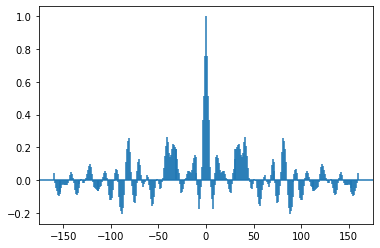

In [45]:
test_dataset = extract_features("./recordings")

In [46]:
test_dataset

,pitch,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc101,mfcc102,mfcc103,mfcc104,mfcc105,mfcc106,mfcc107,mfcc108,mfcc109,mfcc110
0,186.046512,-643.75637,-636.450615,-197.802232,-250.978636,-158.156094,-217.914173,-336.4837,-658.563176,-749.073581,...,15.702925,23.412082,19.281851,36.671207,28.280941,29.222364,9.335564,0.0,0.0,0.0


In [47]:
original_dataset=pd.read_csv('datasets/features.csv')

In [56]:
pickle.dump(original_dataset, open("original_dataset.pkl", "wb"))

In [48]:
original_dataset.iloc[:, :].shape

(7942, 113)

In [49]:
original_dataset=original_dataset.iloc[:,1:-1]

In [50]:
appended_dataset=original_dataset.append(test_dataset)

In [51]:
X = appended_dataset.iloc[:,:].values

In [52]:
X.shape

(7943, 111)

In [53]:
#Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='most_frequent')          
imputer = imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])

In [54]:
print('Feature Scaling')
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Feature Scaling


In [55]:
X_test=np.array(X[-1])
X_test=X_test.reshape(1,111)

print('Predicting ...')
# Predicting the Test set results
y_pred = model_rf.predict(X_test)

if y_pred[0]==1:
    print('Male voice has been predicted')
else:
    print('Female voice has been predicted')

Predicting ...
Female voice has been predicted


In [ ]:
pickle.dump(original_dataset)